# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
table = soup.find('table', class_='table')

In [5]:
# Extract the rows from the table
rows = table.find_all('tr')

# Extract the headers
headers = [header.text.strip() for header in rows[0].find_all('th')]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

# Initialize an empty list to hold the data
data = []


# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skip the header row
    values = [value.text.strip() for value in row.find_all('td')]
    data.append(values)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# Step 3: Store the Data in a DataFrame
mars_df = pd.DataFrame(data, columns=headers)


In [8]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis

mars_df['sol'] = pd.to_numeric(mars_df['sol'])
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'])
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'])
mars_df['ls'] = pd.to_numeric(mars_df['ls'])
mars_df['month'] = pd.to_numeric(mars_df['month'])

mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])


In [11]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = mars_df['month'].nunique()
num_months

12

In [13]:
# 2. How many Martian days' worth of data are there?
num_sols = mars_df['sol'].nunique()
num_sols

1867

In [14]:
# 3. What is the average low temperature by month?

# Calculate the average low temperature by month
avg_low_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Display the result
print(avg_low_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


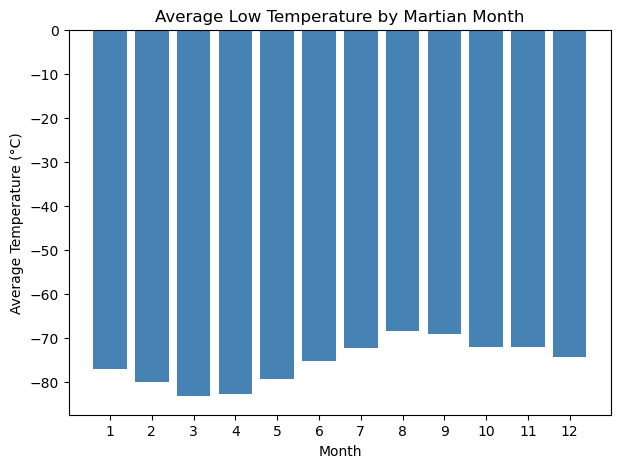

In [15]:
# Plot the average temperature by month

plt.figure(figsize=(7, 5))
plt.bar(avg_low_temp_by_month.index, avg_low_temp_by_month, color='steelblue')
plt.title('Average Low Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1, 13))  # Assuming there are 12 months
plt.show()


In [16]:
# Identify the coldest and hottest months in Curiosity's location

coldest_month = avg_low_temp_by_month.idxmin()
hottest_month = avg_low_temp_by_month.idxmax()

print(f"Coldest Month: {coldest_month}, Average Low Temp: {avg_low_temp_by_month[coldest_month]}°C")
print(f"Hottest Month: {hottest_month}, Average Low Temp: {avg_low_temp_by_month[hottest_month]}°C")


Coldest Month: 3, Average Low Temp: -83.30729166666667°C
Hottest Month: 8, Average Low Temp: -68.38297872340425°C


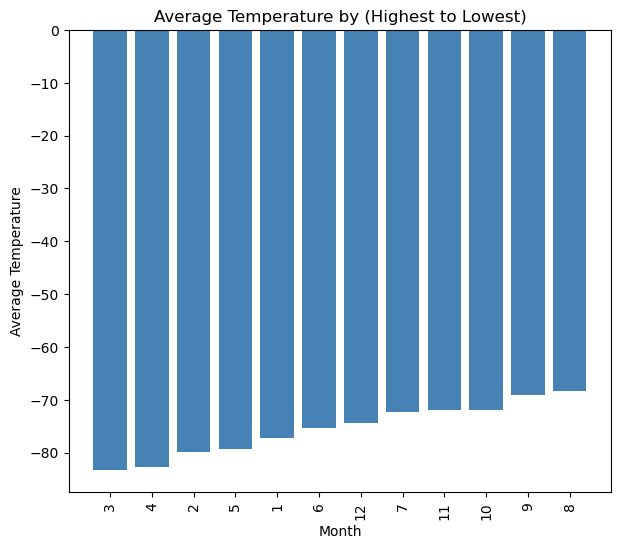

In [17]:
#plot hottest to coldes months in Curiosity's location 

# Convert to DataFrame
df = pd.DataFrame(list(avg_low_temp_by_month.items()), columns=['Month', 'Average Temp'])

# Sort the DataFrame by 'Average Temp' in descending order
df_sorted = df.sort_values(by='Average Temp', ascending=True)

# Create a bar plot
plt.figure(figsize=(7, 6))
plt.bar(df_sorted['Month'].astype(str), df_sorted['Average Temp'], color='steelblue')
plt.title('Average Temperature by (Highest to Lowest)')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(rotation=90)  

# Show the plot
plt.show()


In [18]:
# 4. Average pressure by Martian month
# Calculate the average atmospheric pressure by month
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Display the result
print(avg_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


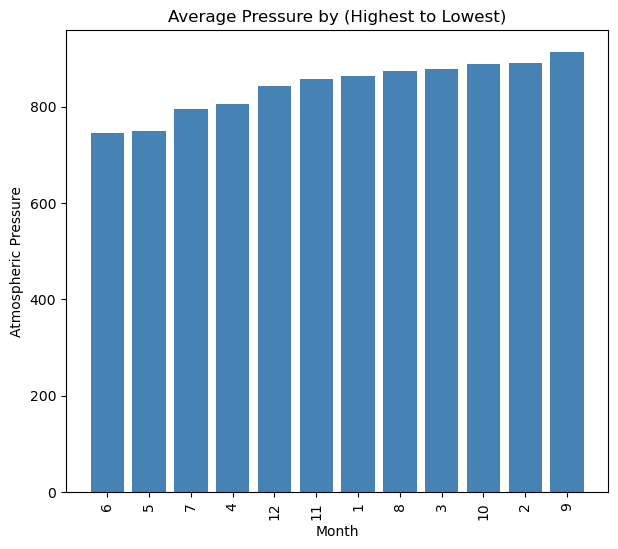

In [19]:
# Plot the average pressure by month

# Convert to DataFrame
df = pd.DataFrame(list(avg_pressure_by_month.items()), columns=['Month', 'Average Pressure'])

# Sort the DataFrame by 'Average Pressure' in descending order
df_sorted = df.sort_values(by='Average Pressure', ascending=True)

# Create a bar plot
plt.figure(figsize=(7, 6))
plt.bar(df_sorted['Month'].astype(str), df_sorted['Average Pressure'], color='steelblue')
plt.title('Average Pressure by (Highest to Lowest)')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=90)  

# Show the plot
plt.show()


In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# calculated the length of a Martian year based on the solar longitude range covered in the dataset.
# A Martian year is approximately 687 Earth days for a full 360-degree range of solar longitude.sample code from ChatGTP 

# solar longitude range
min_ls = mars_df['ls'].min()
max_ls = mars_df['ls'].max()

# Calculate the range of solar longitude
ls_range = max_ls - min_ls

# Convert the range of solar longitude to Earth days
full_martian_year_days = 687  # Approximate length of a Martian year in Earth days
martian_year_days = (ls_range / 360) * full_martian_year_days

print(f"Estimated length of the Martian year in Earth days is approximately {martian_year_days:.2f} days.")

Estimated length of the Martian year in Earth days is approximately 685.09 days.


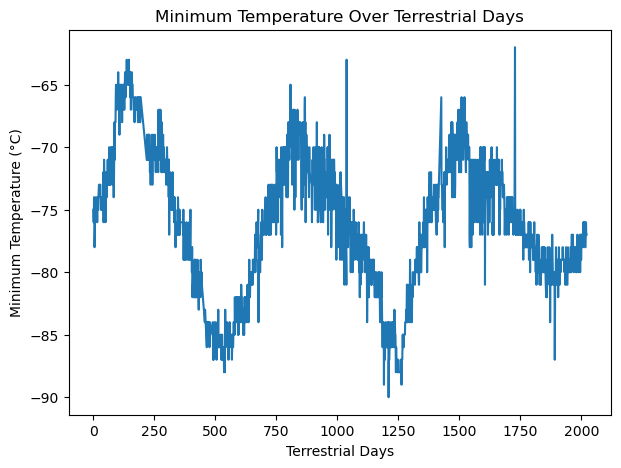

In [21]:
# Visually estimate the result by plotting the terrestrial days and daily minimum temperature.

# Calculate terrestrial days (days since start date)
mars_df['terrestrial_days'] = (mars_df['terrestrial_date'] - mars_df['terrestrial_date'].min()).dt.days

# Plot
plt.figure(figsize=(7, 5))
plt.plot(mars_df['terrestrial_days'], mars_df['min_temp'])
plt.title('Minimum Temperature Over Terrestrial Days')
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)

In [23]:
browser.quit()